https://github.com/Amandawei067/HW2-441B.git

# 1.) Pull in Data and Convert ot Monthly

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# 下载苹果公司的股票数据
apple_data = yf.download('AAPL')

# 按月重采样，获取每个月最后一个交易日的调整后收盘价
df = apple_data.resample("M").last()[["Adj Close"]]  # 选择调整后的收盘价列

# 这里的df就是最终的DataFrame，包含每个月最后一个交易日的调整后收盘价

[*********************100%%**********************]  1 of 1 completed


# 2.) Create columns. 
  - Current Stock Price, Difference in stock price, Whether it went up or down over the next month,  option premium

In [9]:
# 计算每日收盘价的日变化量，并将结果上移一行
df["Diff"] = df.diff().shift(-1)  # 计算相邻两日调整后收盘价的差值，并将差值上移一行

# 根据Diff的正负号设置Target列，正数为1，负数为-1，零保持为零
df["Target"] = np.sign(df["Diff"])  # 根据价格变动方向设定目标值

# 计算调整后收盘价的8%作为Premium列
df["Premium"] = .08 * df["Adj Close"]  # 计算调整后收盘价的8%作为溢价

# 3.) Pull in X data, normalize and build a LogReg on column 2

In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [11]:
#读取csv并且设置index为日期
X = pd.read_csv("Xdata.csv", index_col="Date", parse_dates=["Date"])

In [12]:
y = df.loc[:"2023-09-30","Target"].copy()

df= df.loc[:"2023-09-30",:].copy()

In [13]:
logreg = LogisticRegression()

logreg.fit(X, y)

y_pred = logreg.predict(X)

# 4.) Add columns, prediction and profits.

In [14]:
df["Prediction"] = y_pred

In [15]:
df["Profits"] = 0

In [16]:
#在预测股价上升并且实际股价也上升的情况下，计算每股的利润，这个利润的数值等于之前计算的溢价（Premium列的值）
df.loc[(df["Prediction"]==1) &(df["Target"]==1),"Profits"] = df.loc[(df["Prediction"]==1) &(df["Target"]==1),"Premium"] 

In [17]:
df.loc[(df["Prediction"]==1) &(df["Target"]== -1),"Profits"] = df.loc[(df["Prediction"]==1) &(df["Target"]==-1),"Premium"] +100*df["Diff"]

# 5.) Plot profits over time

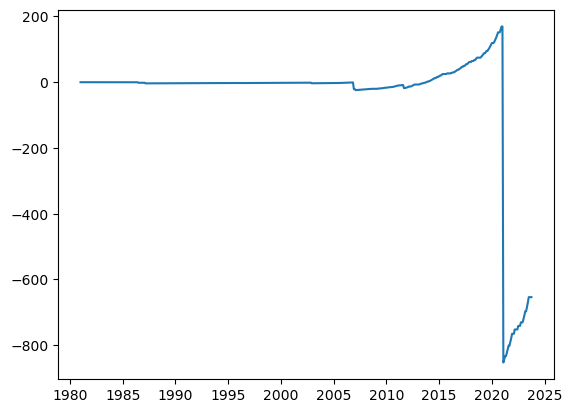

In [18]:
#用于计算给定数组的累计和
plt.plot(np.cumsum(df["Profits"]))

# 5.5) your skills from MQE to Help Mr. Lius ventures
1)Market Analysis and Forecasting: Utilizing econometric models and statistical analysis, I can forecast market trends, analyze the supply and demand dynamics of cryptocurrencies, and predict the impact of regulatory and economic changes on Avalanche and related assets.

2)Risk Management: I can apply Value at Risk (VaR), stress testing, and other risk management techniques to Mr. Liu's investments in Avalanche, ensuring a balanced risk-reward profile.

3)Portfolio Optimization: Employing the Markowitz model or more advanced machine learning algorithms, I can optimize Mr. Liu's investment portfolio. This includes determining the optimal asset allocation within the Avalanche ecosystem and between other crypto and traditional assets.

4)Algorithmic Trading: Designing and implementing algorithmic trading strategies can maximize returns and minimize costs. I can use time-series analysis, machine learning models, and other quantitative techniques to identify trading opportunities in the Avalanche market.

# 6.) Create a loop that stores total profits over time

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score

# 假设X和y已经被定义并准备好了，且模型已训练
logreg = LogisticRegression()
logreg.fit(X, y)

# 获取属于正类的预测概率
probabilities = logreg.predict_proba(X)[:, 1]
# 设置一系列不同的阈值
thresholds = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

sum_of_profits={}
# 循环不同的阈值，并计算每个阈值下的性能指标
for threshold in thresholds:
    # 根据阈值生成新的预测标签
    y_pred = np.where(probabilities >= threshold, 1, -1)
    
    df["Prediction"] = y_pred
    df["Profits"] = 0
    #在预测股价上升并且实际股价也上升的情况下，计算每股的利润，这个利润的数值等于之前计算的溢价（Premium列的值）
    df.loc[(df["Prediction"]==1) &(df["Target"]==1),"Profits"] = df.loc[(df["Prediction"]==1) &(df["Target"]==1),"Premium"]
    df.loc[(df["Prediction"]==1) &(df["Target"]== -1),"Profits"] = df.loc[(df["Prediction"]==1) &(df["Target"]==-1),"Premium"] +100*df["Diff"]
    
    sum_of_profits[threshold] = df["Profits"].sum()
    
print(sum_of_profits)

{0.2: 0, 0.3: 0, 0.4: 0, 0.5: 0, 0.6: 0, 0.7: 0, 0.8: 0, 0.9: 0}


# 7.) What is the optimal threshold and plot the total profits for this model.